In [3]:
import logging
import pandas as pd
import json
from tqdm import tqdm, tqdm_notebook
from collections import defaultdict

CHUNK = 102400  # in bytes
GB = 45097156608

jloads = json.loads

def process(line, total_posts):
    total_posts += 1
    try:
        jline = jloads(line)
        author = jline['author']
        subreddit = jline['subreddit']
        
        subreddits[subreddit] += 1
        authors[author] += 1
        subreddits_authors[subreddit][author] += 1
    except:
        logging.info("Unable to parse", line)

In [4]:
pbar = tqdm_notebook(total=GB)

total_posts = 0
subreddits = defaultdict(int)
authors = defaultdict(int)
subreddits_authors = defaultdict(lambda: defaultdict(int))

with open("../data/raw_data/RC_2017-06", "r") as infile:
    lines = infile.readlines(CHUNK)
    while lines:
        [process(l, total_posts) for l in lines]
        lines = infile.readlines(CHUNK)
        pbar.set_description('processed: %d' % (CHUNK))
        pbar.update(CHUNK)


In [7]:
list(subreddits_authors.items())[:10]

[('RPGStuck_C4',
  defaultdict(int,
              {'nanakishi': 6,
               'Azeleon': 45,
               'LordOfSaiduq': 108,
               'Strategist14': 460,
               'A_GenericUser': 43,
               'subjectivesenescence': 183,
               '12yz12ab': 144,
               'SaintSayonara': 210,
               'Snowydragoon': 31,
               'Voltairemortis': 92,
               'silverleaf2431': 499,
               'Geriferret': 136,
               'jackthepwn': 45,
               'TornSkippito': 310,
               'Irydium': 8,
               'TheBillofLefts': 124,
               'Tzivos': 42,
               'Medixum': 39,
               '_Jumbuck_': 218,
               'dyedFeather': 19,
               'Mathmatt878': 12,
               'Dragonheart50': 78,
               'uraniumUmbreon': 10,
               'Epsylon42': 55,
               'wolfwolf150': 36,
               'spinydoughnut33': 52,
               'BurntThanatoast': 32,
               'TastefullyI

## Subreddits + authors

In [9]:
unique_authors_per_sr = {}

pbar = tqdm_notebook(total=len(subreddits_authors.keys()))
for subreddit, subreddit_dict in subreddits_authors.items():
    unique_authors_per_sr[subreddit] = len(subreddit_dict.keys())
    pbar.update(1)
list(unique_authors_per_sr.items())[:10]

[('RPGStuck_C4', 58),
 ('ClashRoyale', 11763),
 ('PokemonGo_HongKong', 16),
 ('PetiteGoneWild', 4773),
 ('BigBrother', 5468),
 ('leagueoflegends', 65362),
 ('Overwatch', 77049),
 ('ethtrader', 14152),
 ('AskReddit', 676722),
 ('houston', 5576)]

In [12]:
sorted(unique_authors_per_sr.items(), key=lambda x: x[1], reverse=True)

[('AskReddit', 676722),
 ('funny', 182167),
 ('pics', 179532),
 ('gaming', 165751),
 ('worldnews', 165397),
 ('videos', 164342),
 ('todayilearned', 147010),
 ('politics', 135717),
 ('gifs', 130475),
 ('news', 127766),
 ('mildlyinteresting', 113694),
 ('movies', 106090),
 ('aww', 103176),
 ('Showerthoughts', 102303),
 ('pcmasterrace', 100693),
 ('nba', 81390),
 ('Overwatch', 77049),
 ('WTF', 69816),
 ('leagueoflegends', 65362),
 ('millionairemakers', 61632),
 ('television', 56407),
 ('OldSchoolCool', 56378),
 ('The_Donald', 52207),
 ('LifeProTips', 51317),
 ('AdviceAnimals', 51317),
 ('soccer', 46769),
 ('Jokes', 46284),
 ('IAmA', 45875),
 ('nottheonion', 43979),
 ('explainlikeimfive', 41432),
 ('technology', 41409),
 ('BlackPeopleTwitter', 40773),
 ('Music', 40104),
 ('interestingasfuck', 39729),
 ('NintendoSwitch', 37488),
 ('sports', 36301),
 ('personalfinance', 36140),
 ('Games', 35775),
 ('Futurology', 35483),
 ('trees', 35019),
 ('relationships', 34009),
 ('hockey', 33578),
 ('PUB

## Subreddits

In [139]:
total_posts = sum(list(subreddits.values()))
total_posts

79901711

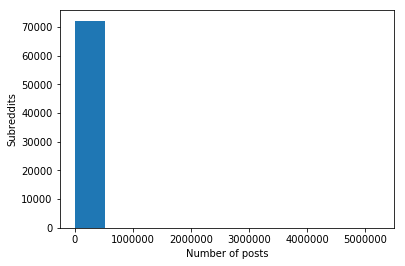

In [42]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

#r = np.random.choice([1, 2, 3, 4, 5], 30)  # 5 appeared 4 times (x = 5, y = 4)
#print(r)
#plt.hist(r)
plt.hist(list(subreddits.values()))
plt.xlabel('Number of posts')
plt.ylabel('Subreddits')
plt.show()

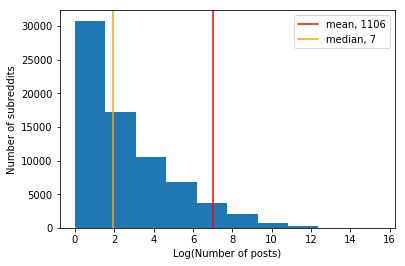

In [79]:
subreddit_post_count = list(subreddits.values())
plt.hist(np.log(subreddit_post_count))
plt.axvline(x=np.log(np.mean(subreddit_post_count)), color='red', label='mean, 1106')
plt.axvline(x=np.log(np.median(subreddit_post_count)), color='orange', label='median, 7')
plt.xlabel("Log(Number of posts)")
plt.ylabel("Number of subreddits")
plt.legend()
plt.show()

# max(subreddit_post_count) = 5236466
# max(np.log(subreddit_post_count)) = 15.471157
# np.exp(15.47) = 5230408

In [132]:
top_sr = sorted(subreddits.items(), key=lambda p: p[1], reverse=True)[:50]
top_sr

[('AskReddit', 5236466),
 ('politics', 1818730),
 ('nba', 1514850),
 ('The_Donald', 1158567),
 ('worldnews', 909968),
 ('news', 755199),
 ('RocketLeagueExchange', 635226),
 ('soccer', 577037),
 ('gaming', 576212),
 ('leagueoflegends', 574660),
 ('funny', 540415),
 ('videos', 529433),
 ('Overwatch', 494513),
 ('pics', 493327),
 ('SquaredCircle', 488149),
 ('hockey', 486157),
 ('todayilearned', 454643),
 ('ukpolitics', 449028),
 ('pcmasterrace', 408458),
 ('movies', 404619),
 ('ffxiv', 381683),
 ('anime', 349779),
 ('4chan4trump', 321278),
 ('gifs', 313911),
 ('relationships', 305825),
 ('DotA2', 300765),
 ('Showerthoughts', 300293),
 ('nfl', 298468),
 ('MMA', 291480),
 ('NintendoSwitch', 285643),
 ('2007scape', 285037),
 ('ethtrader', 284990),
 ('rupaulsdragrace', 275772),
 ('mildlyinteresting', 257823),
 ('conspiracy', 248705),
 ('teenagers', 248194),
 ('europe', 247499),
 ('GlobalOffensive', 239844),
 ('Games', 237639),
 ('aww', 235014),
 ('xboxone', 231132),
 ('hiphopheads', 223284),

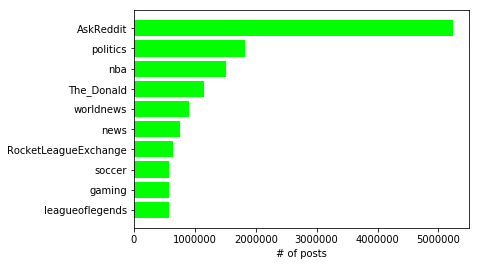

In [138]:
plt.barh(width=[i[1] for i in top_sr[:10]][::-1], y=[i[0] for i in top_sr[:10]][::-1], color='lime')
plt.xlabel("# of posts")
plt.show()

## Authors

In [122]:
import copy
# don't want [deleted]
original_authors = copy.deepcopy(authors)
#del authors['[deleted]']
author_post_count = list(authors.values())
sorted(authors.items(), key=lambda p: p[1], reverse=True)

[('AutoModerator', 709356),
 ('grrrrreat', 314811),
 ('ImagesOfNetwork', 93441),
 ('video_descriptionbot', 74247),
 ('imguralbumbot', 53101),
 ('WikiTextBot', 33438),
 ('RPBot', 31242),
 ('autotldr', 23437),
 ('MTGCardFetcher', 22801),
 ('sneakpeekbot', 20255),
 ('youtubefactsbot', 20093),
 ('Shark_Bot', 17707),
 ('SnapshillBot', 16859),
 ('_youtubot_', 16315),
 ('hwsbot', 15639),
 ('teddyRbot', 14025),
 ('keepdankmemesdank', 13542),
 ('TotesMessenger', 13075),
 ('DemonBurritoCat', 12166),
 ('Pawpatrolbatman', 11800),
 ('Mama_Meertens', 11557),
 ('gifv-bot', 11366),
 ('BitcoinAllBot', 11244),
 ('HelperBot_', 10742),
 ('WritingPromptsRobot', 10656),
 ('cheer_up_bot', 10635),
 ('mrsuns10', 10554),
 ('JlmmyButler', 9632),
 ('Not_Just_You', 9257),
 ('strawberrygirl1000', 8988),
 ('anti-gif-bot', 8499),
 ('smarvin6689', 8229),
 ('Roboragi', 7954),
 ('False1512', 7536),
 ('samacharbot2', 7507),
 ('Smartstocks', 7441),
 ('avidjam', 7101),
 ('Urbul', 6940),
 ('TwitterToStreamable', 6913),
 ('M

In [123]:
len(author_post_count)

3721512

709356


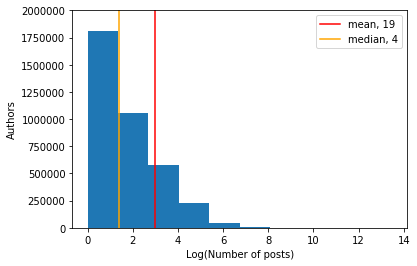

In [124]:
import math
print(max(author_post_count))

plt.ylim(0, 2000000)
plt.hist(np.log(author_post_count))
plt.axvline(x=np.log(np.mean(author_post_count)),
            color='red', label='mean, {}'.format(math.floor(np.mean(author_post_count))))
plt.axvline(x=np.log(np.median(author_post_count)),
            color='orange', label='median, {}'.format(math.floor(np.median(author_post_count))))
plt.xlabel("Log(Number of posts)")
plt.ylabel("Authors")
plt.legend()
plt.show()

In [125]:
blacklist = []
with open("../data/filtering/reddit_bots.txt", "r") as infile:
    blacklist.extend([l.replace("\n", "") for l in infile.readlines()])
with open("../data/filtering/suspicious_authors.txt", "r") as infile:
    blacklist.extend([l.replace("\n", "") for l in infile.readlines()])
blacklist[:5]

['A858DE45F56D9BC9', 'AAbot', 'ADHDbot', 'ALTcointip', 'AVR_Modbot']

In [126]:
pbar = tqdm_notebook(total=len(authors.items()))

authors_no_bots = []
for item in authors.items():
    if ('bot' not in item[0].lower()) and (item[0] not in blacklist):
        authors_no_bots.append(item)
    pbar.update(1)
len(authors_no_bots)

3710914

In [127]:
sorted(authors_no_bots, key=lambda x: x[1], reverse=True)

[('avidjam', 7101),
 ('piyushsharma301', 6566),
 ('Tamaki_Suoh', 6363),
 ('-aiyah-', 5666),
 ('InThisHouse19', 5436),
 ('MrManicMarty', 5303),
 ('Throwaway64209', 4865),
 ('HSisMyStyle11', 4805),
 ('HermioneReynaChase', 4530),
 ('tblprg', 4318),
 ('Mannie_T', 4194),
 ('Stokest26', 4044),
 ('Geosaurusrex', 4018),
 ('Waffles-No-Okami', 3996),
 ('ItsVinn', 3990),
 ('Dalek1234', 3948),
 ('Iamspeedy36', 3853),
 ('Earthboun41', 3768),
 ('iwas99x', 3727),
 ('theivoryserf', 3725),
 ('HueyFE2011', 3707),
 ('Viivizzu', 3633),
 ('MBAMBA0', 3567),
 ('PapiDimmi', 3549),
 ('Heknarf', 3493),
 ('plax1780', 3489),
 ('RogueryNight', 3446),
 ('HUNS0N_ABADEER', 3410),
 ('FalcowUnleashed', 3389),
 ('Delsana', 3351),
 ('exasperated_dreams', 3337),
 ('11th_Plague', 3312),
 ('Crappy99', 3252),
 ('frostyuno', 3244),
 ('SoundBearier', 3219),
 ('purplespengler', 3216),
 ('pajamakitten', 3203),
 ('silverleaf2431', 3176),
 ('Tranquilsunrise', 3171),
 ('TheWanderingTalker', 3138),
 ('Love8Death', 3055),
 ('you_got_

7101


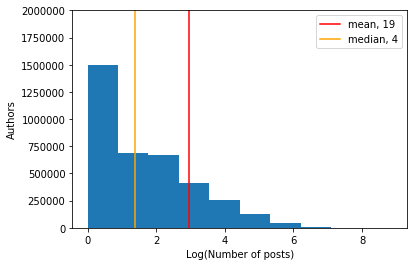

In [128]:
author_post_count = [i[1] for i in authors_no_bots]
print(max(author_post_count))

plt.ylim(0, 2000000)
plt.hist(np.log(author_post_count))
plt.axvline(x=np.log(np.mean(author_post_count)),
            color='red', label='mean, {}'.format(math.floor(np.mean(author_post_count))))
plt.axvline(x=np.log(np.median(author_post_count)),
            color='orange', label='median, {}'.format(math.floor(np.median(author_post_count))))
plt.xlabel("Log(Number of posts)")
plt.ylabel("Authors")
plt.legend()
plt.show()